In [138]:
! pip install plotly==5.0.0
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
#import necesseary modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import requests
import html5lib
import re
import bs4
from bs4 import BeautifulSoup
from pylab import rcParams
import csv
import os
from google.colab import drive
import glob
from scipy.stats import pearsonr
import scipy
import scipy.stats
from scipy.stats import t
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from functools import reduce
pd.set_option("display.max_rows", None, "display.max_columns", None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, that we imported the modules, i going to import the necesseary csv files to create our code.

In [140]:
df1= pd.read_csv("/content/drive/MyDrive/csv files/capture-fisheries-vs-aquaculture.csv")
df1.head(5)

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0


In [141]:
df2 = pd.read_csv("/content/drive/MyDrive/csv files/cereal-yield.csv")
df2.head(5)

,Entity,Code,Year,Cereals | 00001717 || Yield | 005419 || tonnes per hectare
0,Afghanistan,AFG,1961,1.1151
1,Afghanistan,AFG,1962,1.0790
2,Afghanistan,AFG,1963,0.9858
3,Afghanistan,AFG,1964,1.0828
4,Afghanistan,AFG,1965,1.0989


In [142]:
df3= pd.read_csv("/content/drive/MyDrive/csv files/cost-healthy-diet.csv")
df3.head(5)

,Entity,Code,Year,cost_healthy_diet
0,Albania,ALB,2017,3.952
1,Albania,ALB,2018,4.051
2,Albania,ALB,2019,4.117
3,Albania,ALB,2020,4.197
4,Algeria,DZA,2017,3.763


In [143]:
df4= pd.read_csv("/content/drive/MyDrive/csv files/dalys-rate-from-all-causes.csv")
df4.head(5)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,86375.17
1,Afghanistan,AFG,1991,83381.07
2,Afghanistan,AFG,1992,79890.55
3,Afghanistan,AFG,1993,80292.52
4,Afghanistan,AFG,1994,83334.93


In [144]:
df5= pd.read_csv("/content/drive/MyDrive/csv files/gdp-world-regions-stacked-area.csv")
df5.head(5)

,Entity,Code,Year,GDP,417484-annotations
0,Afghanistan,AFG,1950,9421400064,NaN
1,Afghanistan,AFG,1951,9692279808,NaN
2,Afghanistan,AFG,1952,10017325056,NaN
3,Afghanistan,AFG,1953,10630519808,NaN
4,Afghanistan,AFG,1954,10866360320,NaN


In [145]:
df6= pd.read_csv("/content/drive/MyDrive/csv files/malnutrition-death-rates-by-age.csv")
df6.head(5)

,Entity,Code,Year,Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate)
0,Afghanistan,AFG,1990,87.34,3.34,2.75,3.35,4.84,11.04,17.99
1,Afghanistan,AFG,1991,76.95,3.38,2.66,3.40,4.92,9.93,16.84
2,Afghanistan,AFG,1992,70.89,3.44,2.56,3.53,5.02,9.34,16.53
3,Afghanistan,AFG,1993,72.54,3.57,2.58,3.64,5.18,9.75,17.50
4,Afghanistan,AFG,1994,73.77,3.72,2.63,3.60,5.34,10.13,18.16


In [146]:
df7= pd.read_csv("/content/drive/MyDrive/csv files/mdg3a-gpi-education.csv")
df7.head(5)

,Entity,Code,Year,MDG3.A: gender parity index
0,Primary education,NaN,1991,0.87
1,Primary education,NaN,2000,0.91
2,Primary education,NaN,2015,0.98
3,Secondary education,NaN,1991,0.77
4,Secondary education,NaN,2000,0.89


In [147]:
df8= pd.read_csv("/content/drive/MyDrive/csv files/number-acute-care-beds.csv")
df8.head(5)

,Entity,Code,Year,Acute care beds (total number)
0,Austria,AUT,2005,52870.0
1,Austria,AUT,2006,52679.0
2,Austria,AUT,2007,52922.0
3,Austria,AUT,2008,52364.0
4,Austria,AUT,2009,51967.0


In [148]:
df9=pd.read_csv("/content/drive/MyDrive/consumption-co2-per-capita-vs-gdppc.csv")
df9.head(5)

,Entity,Code,Year,Annual consumption-based CO₂ emissions (per capita),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1189.784668,21000258.0,NaN
2,Afghanistan,AFG,2003,NaN,1235.810059,22645136.0,NaN
3,Afghanistan,AFG,2004,NaN,1200.277954,23553554.0,NaN
4,Afghanistan,AFG,2005,NaN,1286.793701,24411196.0,NaN


Now that we downloaded the files, let's combine them and look what kind of dataframe comes out of it.

In [149]:
#using directory
os.chdir("/content")

In [150]:
#find csv files
extension = 'csv'
all_filenames = all_filenames = [i for i in glob.glob("/content/drive/MyDrive/csv files/*.csv")]

In [151]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
combined_csv.head(5)

<ipython-input-151-158ebca44638>:2: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])


,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cereals | 00001717 || Yield | 005419 || tonnes per hectare,MDG3.A: gender parity index,Acute care beds (total number),Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate),GDP,417484-annotations,DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate),cost_healthy_diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Annual CO₂ emissions,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium,Population density,Global average temperature anomaly relative to 1961-1990,Upper bound (95% confidence interval) of the annual temperature anomaly,Lower bound (95% confidence interval) of the annual temperature anomaly,Annual CO₂ emissions embedded in trade (per capita),Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent),Oil - Crude prices since 1861 (2021 $),Oil Consumption - Barrels,Continent,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO2 emissions","Average price on emissions covered by an ETS, weighted by the share of the country's CO2 emissions",CO2 emissions covered by a carbon tax or an ETS as a share of the country's CO2 emissions,CO2 emissions covered by a carbon tax as a share of the country's CO2 emissions,CO2 emissions covered by an ETS as a share of the country's CO2 emissions,Global weighted average cost of electricity (2019 USD/kWh),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Afghanistan,AFG,1969.0,60.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1970.0,60.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1971.0,60.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1972.0,60.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1973.0,60.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# applying groupby() function to
# group the data on entity value.
df_entities=combined_csv.groupby(['Entity']).mean()
df_entities.head(20)

,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cereals | 00001717 || Yield | 005419 || tonnes per hectare,MDG3.A: gender parity index,Acute care beds (total number),Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate),GDP,DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate),cost_healthy_diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Annual CO₂ emissions,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium,Population density,Global average temperature anomaly relative to 1961-1990,Upper bound (95% confidence interval) of the annual temperature anomaly,Lower bound (95% confidence interval) of the annual temperature anomaly,Annual CO₂ emissions embedded in trade (per capita),Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent),Oil - Crude prices since 1861 (2021 $),Oil Consumption - Barrels,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO2 emissions","Average price on emissions covered by an ETS, weighted by the share of the country's CO2 emissions",CO2 emissions covered by a carbon tax or an ETS as a share of the country's CO2 emissions,CO2 emissions covered by a carbon tax as a share of the country's CO2 emissions,CO2 emissions covered by an ETS as a share of the country's CO2 emissions,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
Entity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abkhazia,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1852.566350,1131.000000,895.762712,1.416355,NaN,NaN,47.210000,2.920667,2.080000,2.467000,4.251333,6.902000,11.141000,2.146437e+10,71731.817333,NaN,7.751635e+06,46.000000,2.986206e+06,1.664067e+07,8.247701e+07,38.625491,NaN,NaN,NaN,NaN,0.149430,NaN,NaN,NaN,NaN,NaN,0.0000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,1768.275961,NaN,NaN,1.246256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.580638e+08,NaN,1.806385e+08,NaN,NaN,28.908580,NaN,NaN,NaN,-0.329702,0.337200,3384.803675,23.503906,271.602536,NaN,350711.271372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (BP),1993.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350711.270954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (FAO),1990.417827,NaN,NaN,1.207272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.149831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (GCP),1935.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857309e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (UN),2025.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.434448e+08,2.816792e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
African Region (WHO),

In [153]:
#drop duplicates
df_doubles = df_entities.drop_duplicates(subset=list(df_entities.columns))
print(df_entities.shape)
df_doubles.head(20)

(440, 44)


,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cereals | 00001717 || Yield | 005419 || tonnes per hectare,MDG3.A: gender parity index,Acute care beds (total number),Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate),GDP,DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate),cost_healthy_diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Annual CO₂ emissions,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium,Population density,Global average temperature anomaly relative to 1961-1990,Upper bound (95% confidence interval) of the annual temperature anomaly,Lower bound (95% confidence interval) of the annual temperature anomaly,Annual CO₂ emissions embedded in trade (per capita),Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent),Oil - Crude prices since 1861 (2021 $),Oil Consumption - Barrels,"Average price on emissions covered by a carbon tax, weighted by the share of the country's CO2 emissions","Average price on emissions covered by an ETS, weighted by the share of the country's CO2 emissions",CO2 emissions covered by a carbon tax or an ETS as a share of the country's CO2 emissions,CO2 emissions covered by a carbon tax as a share of the country's CO2 emissions,CO2 emissions covered by an ETS as a share of the country's CO2 emissions,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
Entity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abkhazia,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1852.566350,1131.000000,895.762712,1.416355,NaN,NaN,47.210000,2.920667,2.080000,2.467000,4.251333,6.902000,11.141000,2.146437e+10,71731.817333,NaN,7.751635e+06,46.000000,2.986206e+06,1.664067e+07,8.247701e+07,38.625491,NaN,NaN,NaN,NaN,0.149430,NaN,NaN,NaN,NaN,NaN,0.0000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,1768.275961,NaN,NaN,1.246256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.580638e+08,NaN,1.806385e+08,NaN,NaN,28.908580,NaN,NaN,NaN,-0.329702,0.337200,3384.803675,23.503906,271.602536,NaN,350711.271372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (BP),1993.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350711.270954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (FAO),1990.417827,NaN,NaN,1.207272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.149831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (GCP),1935.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857309e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (UN),2025.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.434448e+08,2.816792e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
African Region (WHO),

We have allot of columns here, let's check them

In [154]:
#check columns
df_doubles.columns

Index(['Year', 'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'MDG3.A: gender parity index', 'Acute care beds (total number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate)',
       'GDP',
       'DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)',
       'cost_healthy_diet', 'Population (h

In [155]:
#drop year in dataframe
df_doubles.drop(['Deaths - Protein-energy malnutrition - Sex: Both - Age: Under 5 (Rate)',	
                 'Deaths - Protein-energy malnutrition - Sex: Both - Age: 50-69 years (Rate)',
                 'Deaths - Protein-energy malnutrition - Sex: Both - Age: 15-49 years (Rate)',	
                 'Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Rate)',
                 'Deaths - Protein-energy malnutrition - Sex: Both - Age: 70+ years (Rate)',
                 'Annual CO₂ emissions embedded in trade (per capita)',
                 'Population - Sex: all - Age: all - Variant: estimates',
                 'Population - Sex: all - Age: all - Variant: medium', 'Annual CO₂ emissions',
                 'Average price on emissions covered by a carbon tax, weighted by the share of the country\'s CO2 emissions', 
                 'Average price on emissions covered by an ETS, weighted by the share of the country\'s CO2 emissions',
                 'Average price on emissions covered by a carbon tax, weighted by the share of the country\'s CO2 emissions',
                 'Average price on emissions covered by an ETS, weighted by the share of the country\'s CO2 emissions',
                 'CO2 emissions covered by a carbon tax or an ETS as a share of the country\'s CO2 emissions',
                 'CO2 emissions covered by a carbon tax as a share of the country\'s CO2 emissions',
                 'Oil - Crude prices since 1861 (2021 $)', 'Oil Consumption - Barrels',
                 'CO2 emissions covered by an ETS as a share of the country\'s CO2 emissions',
                 'Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy',
                 'Offshore wind levelized cost of energy', 'Solar photovoltaic levelized cost of energy',
                 'Concentrated solar power levelized cost of energy', 'Hydropower levelized cost of energy',
                 'Onshore wind levelized cost of energy', 'Year'], axis = 1 , inplace=True)
df_doubles.head(20)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Aquaculture production (metric tons),Capture fisheries production (metric tons),Cereals | 00001717 || Yield | 005419 || tonnes per hectare,MDG3.A: gender parity index,Acute care beds (total number),Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate),GDP,DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate),cost_healthy_diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Population density,Global average temperature anomaly relative to 1961-1990,Upper bound (95% confidence interval) of the annual temperature anomaly,Lower bound (95% confidence interval) of the annual temperature anomaly,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent)
Entity,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1131.000000,895.762712,1.416355,NaN,NaN,6.902000,11.141000,2.146437e+10,71731.817333,NaN,7.751635e+06,46.000000,38.625491,NaN,NaN,NaN,0.149430,NaN,NaN,NaN
Africa,NaN,NaN,1.246256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.580638e+08,NaN,28.908580,NaN,NaN,NaN,0.337200,3384.803675,23.503906,271.602536
Africa (BP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (FAO),NaN,NaN,1.207272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.149831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa (UN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
African Region (WHO),NaN,NaN,NaN,NaN,NaN,22.438000,22.952000,NaN,71840.571333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1260.661017,6115.879675,2.922538,NaN,NaN,0.539000,0.532667,1.160662e+10,27015.075667,4.07925,1.160743e+06,17.820848,50.580183,NaN,NaN,NaN,1.232323,NaN,NaN,NaN


Now let's see what we change by checking the columns again.

In [156]:
#check info columns again
df_doubles.columns

Index(['Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'MDG3.A: gender parity index', 'Acute care beds (total number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate)',
       'GDP',
       'DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)',
       'cost_healthy_diet', 'Population (historical estimates)',
       'Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent',
       'Population density',
       'Global average temperature anomaly relative to 1961-1990',
       'Upper bound (95% confidence interval) of the annual temperature anomaly',
       'Lower bound (95% confidence interval) of the annual temperature anomaly',
       'Annual CO₂ emissions (per capita)'

In [159]:
#rename columns for better readable examples
# Or rename the existing DataFrame (rather than creating a copy) 
df_doubles.rename(columns={'Aquaculture production (metric tons)': 'aquaculture', 'Capture fisheries production (metric tons)': 'capture fish', 'Acute care beds (total number)': 'acute care',
                           'MDG3.A: gender parity index':'gender parity', 'Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)':'malnutrition standard age',
                           'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Rate)': 'malnutrition all ages', 'GDP': 'gdp', 'Cereals | 00001717 || Yield | 005419 || tonnes per hectare': 'cereals',
                           'DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)': 'disability life years', 'cost_healthy_diet': 'healthy diet',
                           'Population - Sex: all - Age: all - Variant: estimates': 'variant all age sex population estimates', 'Population - Sex: all - Age: all - Variant: medium': 'all age medium sex population',
                           'Global average temperature anomaly relative to 1961-1990': '29 years global average temperature', 'Upper bound (95% confidence interval) of the annual temperature anomaly': 'upper bound annual temperature',
                           'Lower bound (95% confidence interval) of the annual temperature anomaly': 'lower bound annual temperature', 'Nuclear per capita (kWh - equivalent)': 'nuclear kwh - equivalent per capita', 
                           'Renewables per capita (kWh - equivalent)': 'renewable per capita kwh'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [160]:
#remove nan values using fillna and mean function
df_mean_values = df_doubles.fillna(df_doubles.mean())
df_mean_values.head(20)

,aquaculture,capture fish,cereals,gender parity,acute care,malnutrition standard age,malnutrition all ages,gdp,disability life years,healthy diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Population density,29 years global average temperature,upper bound annual temperature,lower bound annual temperature,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),nuclear kwh - equivalent per capita,renewable per capita kwh
Entity,,,,,,,,,,,,,,,,,,,,
Abkhazia,885460.188399,1.696111e+06,2.564712,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,3.804008e+07,21.500942,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
Afghanistan,1131.000000,8.957627e+02,1.416355,0.885556,223244.138099,6.902000,11.141000,2.146437e+10,71731.817333,3.416433,7.751635e+06,46.000000,38.625491,-0.078882,0.03311,-0.190874,0.149430,31412.287190,1477.148373,4175.747508
Africa,885460.188399,1.696111e+06,1.246256,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,2.580638e+08,21.500942,28.908580,-0.078882,0.03311,-0.190874,0.337200,3384.803675,23.503906,271.602536
Africa (BP),885460.188399,1.696111e+06,2.564712,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,3.804008e+07,21.500942,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
Africa (FAO),885460.188399,1.696111e+06,1.207272,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,3.804008e+07,29.149831,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
Africa (GCP),885460.188399,1.696111e+06,2.564712,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,3.804008e+07,21.500942,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
Africa (UN),885460.188399,1.696111e+06,2.564712,0.885556,223244.138099,9.633624,8.571427,5.985399e+11,42372.219173,3.416433,3.804008e+07,21.500942,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
African Region (WHO),885460.188399,1.696111e+06,2.564712,0.885556,223244.138099,22.438000,22.952000,5.985399e+11,71840.571333,3.416433,3.804008e+07,21.500942,276.965753,-0.078882,0.03311,-0.190874,4.005149,31412.287190,1477.148373,4175.747508
Albania,1260.661017,6.115880e+03,2.922538,0.885556,223244.138099,0.539000,0.532667,1.160662e+10,27015.075667,4.079250,1.160743e+06,17.820848,50.580183,-0.078882,0.03311,-0.190874,1.232323,31412.287190,1477.148373,4175.747508


In [161]:
# To find the correlation among
# the columns using pearson method
df_corr = df_mean_values.corr(method ='pearson')
df_corr

,aquaculture,capture fish,cereals,gender parity,acute care,malnutrition standard age,malnutrition all ages,gdp,disability life years,healthy diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Population density,29 years global average temperature,upper bound annual temperature,lower bound annual temperature,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),nuclear kwh - equivalent per capita,renewable per capita kwh
aquaculture,1.000000e+00,8.731397e-01,2.324102e-02,-1.830935e-16,2.890463e-01,-1.478979e-02,-1.666919e-02,4.494910e-01,-2.533171e-02,1.109749e-02,4.017704e-01,2.294685e-02,1.010694e-02,4.073481e-17,1.351148e-16,3.243620e-16,1.872575e-03,-6.234867e-02,-3.278501e-02,-2.641406e-02
capture fish,8.731397e-01,1.000000e+00,3.095935e-02,-2.417240e-16,9.655369e-02,-2.586943e-02,-2.493556e-02,6.548911e-01,-2.942567e-02,9.618164e-03,5.453020e-01,1.988940e-03,-1.494448e-02,2.964246e-16,1.669891e-16,2.735473e-16,-1.401319e-02,-5.593002e-02,-1.733533e-02,-7.557412e-03
cereals,2.324102e-02,3.095935e-02,1.000000e+00,9.731057e-16,1.529269e-02,-3.032781e-01,-3.220362e-01,2.666184e-02,-4.663947e-01,-7.728681e-02,3.009555e-02,-1.985484e-01,5.334685e-03,8.765791e-16,3.280414e-16,-5.269497e-17,1.817858e-01,2.917594e-01,2.019644e-01,3.036445e-02
gender parity,-1.830935e-16,-2.417240e-16,9.731057e-16,1.000000e+00,-3.122394e-16,2.684074e-16,5.304063e-16,1.286441e-16,-7.045473e-17,7.858557e-16,-1.852764e-16,2.238386e-16,-8.728227e-17,-1.127724e-15,-1.111413e-15,-1.590095e-15,5.512837e-16,-7.337547e-17,1.060999e-15,-3.720572e-16
acute care,2.890463e-01,9.655369e-02,1.529269e-02,-3.122394e-16,1.000000e+00,1.354467e-02,1.199403e-02,9.600999e-02,1.891042e-02,8.597900e-04,1.782442e-01,5.133575e-02,-6.747017e-03,-4.263099e-16,-1.014082e-16,2.096072e-16,-1.500629e-02,-6.513834e-02,-4.603496e-02,-8.085750e-02
malnutrition standard age,-1.478979e-02,-2.586943e-02,-3.032781e-01,2.684074e-16,1.354467e-02,1.000000e+00,9.601999e-01,-2.804872e-02,6.417052e-01,-3.689918e-02,-2.186202e-02,1.628950e-01,-3.591745e-02,-5.804416e-16,-1.177671e-16,1.819882e-16,-1.049464e-01,-5.427132e-02,-2.984141e-02,-2.576846e-02
malnutrition all ages,-1.666919e-02,-2.493556e-02,-3.220362e-01,5.304063e-16,1.199403e-02,9.601999e-01,1.000000e+00,-2.886660e-02,6.837666e-01,-5.853407e-02,-1.963465e-02,1.947590e-01,-3.540209e-02,-4.904809e-16,-7.678414e-17,2.810527e-16,-1.070400e-01,-4.575553e-02,-1.611841e-02,-2.017759e-02
gdp,4.494910e-01,6.548911e-01,2.666184e-02,1.286441e-16,9.600999e-02,-2.804872e-02,-2.886660e-02,1.000000e+00,-2.665773e-02,1.078567e-02,7.199221e-01,1.383794e-03,1.383268e-03,1.303921e-15,5.192921e-16,4.515980e-16,2.653124e-03,-5.090430e-02,-1.236055e-02,-3.557082e-02
disability life years,-2.533171e-02,-2.942567e-02,-4.663947e-01,-7.045473e-17,1.891042e-02,6.417052e-01,6.837666e-01,-2.665773e-02,1.000000e+00,-4.515926e-03,-1.252333e-02,2.194692e-01,-6.138613e-02,-3.183852e-16,-7.398474e-18,4.775193e-16,-1.226932e-01,-7.355308e-02,-8.832321e-02,-9.170405e-02
healthy diet,1.109749e-02,9.618164e-03,-7.728681e-02,7.858557e-16,8.597900e-04,-3.689918e-02,-5.853407e-02,1.078567e-02,-4.515926e-03,1.000000e+00,-2.222360e-02,-1.387250e-01,1.146903e-02,-4.100131e-17,1.164082e-17,2.106317e-17,8.357998e-02,-1.184736e-01,-1.427188e-02,-1.058168e-01


We  also see there are allot of columns without loyal information, so it's best to remove those columns.

In [162]:
# Drop columns that has all NaN values
df_netto_info =df_corr.dropna(axis=1,how='all')
df_netto_info.head(20)

,aquaculture,capture fish,cereals,gender parity,acute care,malnutrition standard age,malnutrition all ages,gdp,disability life years,healthy diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Population density,29 years global average temperature,upper bound annual temperature,lower bound annual temperature,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),nuclear kwh - equivalent per capita,renewable per capita kwh
aquaculture,1.000000e+00,8.731397e-01,2.324102e-02,-1.830935e-16,2.890463e-01,-1.478979e-02,-1.666919e-02,4.494910e-01,-2.533171e-02,1.109749e-02,4.017704e-01,2.294685e-02,1.010694e-02,4.073481e-17,1.351148e-16,3.243620e-16,1.872575e-03,-6.234867e-02,-3.278501e-02,-2.641406e-02
capture fish,8.731397e-01,1.000000e+00,3.095935e-02,-2.417240e-16,9.655369e-02,-2.586943e-02,-2.493556e-02,6.548911e-01,-2.942567e-02,9.618164e-03,5.453020e-01,1.988940e-03,-1.494448e-02,2.964246e-16,1.669891e-16,2.735473e-16,-1.401319e-02,-5.593002e-02,-1.733533e-02,-7.557412e-03
cereals,2.324102e-02,3.095935e-02,1.000000e+00,9.731057e-16,1.529269e-02,-3.032781e-01,-3.220362e-01,2.666184e-02,-4.663947e-01,-7.728681e-02,3.009555e-02,-1.985484e-01,5.334685e-03,8.765791e-16,3.280414e-16,-5.269497e-17,1.817858e-01,2.917594e-01,2.019644e-01,3.036445e-02
gender parity,-1.830935e-16,-2.417240e-16,9.731057e-16,1.000000e+00,-3.122394e-16,2.684074e-16,5.304063e-16,1.286441e-16,-7.045473e-17,7.858557e-16,-1.852764e-16,2.238386e-16,-8.728227e-17,-1.127724e-15,-1.111413e-15,-1.590095e-15,5.512837e-16,-7.337547e-17,1.060999e-15,-3.720572e-16
acute care,2.890463e-01,9.655369e-02,1.529269e-02,-3.122394e-16,1.000000e+00,1.354467e-02,1.199403e-02,9.600999e-02,1.891042e-02,8.597900e-04,1.782442e-01,5.133575e-02,-6.747017e-03,-4.263099e-16,-1.014082e-16,2.096072e-16,-1.500629e-02,-6.513834e-02,-4.603496e-02,-8.085750e-02
malnutrition standard age,-1.478979e-02,-2.586943e-02,-3.032781e-01,2.684074e-16,1.354467e-02,1.000000e+00,9.601999e-01,-2.804872e-02,6.417052e-01,-3.689918e-02,-2.186202e-02,1.628950e-01,-3.591745e-02,-5.804416e-16,-1.177671e-16,1.819882e-16,-1.049464e-01,-5.427132e-02,-2.984141e-02,-2.576846e-02
malnutrition all ages,-1.666919e-02,-2.493556e-02,-3.220362e-01,5.304063e-16,1.199403e-02,9.601999e-01,1.000000e+00,-2.886660e-02,6.837666e-01,-5.853407e-02,-1.963465e-02,1.947590e-01,-3.540209e-02,-4.904809e-16,-7.678414e-17,2.810527e-16,-1.070400e-01,-4.575553e-02,-1.611841e-02,-2.017759e-02
gdp,4.494910e-01,6.548911e-01,2.666184e-02,1.286441e-16,9.600999e-02,-2.804872e-02,-2.886660e-02,1.000000e+00,-2.665773e-02,1.078567e-02,7.199221e-01,1.383794e-03,1.383268e-03,1.303921e-15,5.192921e-16,4.515980e-16,2.653124e-03,-5.090430e-02,-1.236055e-02,-3.557082e-02
disability life years,-2.533171e-02,-2.942567e-02,-4.663947e-01,-7.045473e-17,1.891042e-02,6.417052e-01,6.837666e-01,-2.665773e-02,1.000000e+00,-4.515926e-03,-1.252333e-02,2.194692e-01,-6.138613e-02,-3.183852e-16,-7.398474e-18,4.775193e-16,-1.226932e-01,-7.355308e-02,-8.832321e-02,-9.170405e-02
healthy diet,1.109749e-02,9.618164e-03,-7.728681e-02,7.858557e-16,8.597900e-04,-3.689918e-02,-5.853407e-02,1.078567e-02,-4.515926e-03,1.000000e+00,-2.222360e-02,-1.387250e-01,1.146903e-02,-4.100131e-17,1.164082e-17,2.106317e-17,8.357998e-02,-1.184736e-01,-1.427188e-02,-1.058168e-01


In [163]:
# To find the correlation among
# the columns using kendall method
df_kendall = df_netto_info.corr(method='kendall')
df_kendall

,aquaculture,capture fish,cereals,gender parity,acute care,malnutrition standard age,malnutrition all ages,gdp,disability life years,healthy diet,Population (historical estimates),Land under perm. meadows and pastures | 00006655 || Share in Land area | 007209 || percent,Population density,29 years global average temperature,upper bound annual temperature,lower bound annual temperature,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),nuclear kwh - equivalent per capita,renewable per capita kwh
aquaculture,1.000000,0.768421,0.126316,-0.084211,0.557895,-0.105263,-0.178947,0.821053,-0.136842,0.410526,0.652632,0.094737,0.168421,0.063158,0.115789,0.105263,0.136842,-0.336842,-0.347368,-0.315789
capture fish,0.768421,1.000000,0.147368,-0.126316,0.494737,-0.126316,-0.178947,0.757895,-0.157895,0.263158,0.673684,0.052632,0.105263,0.189474,0.157895,0.084211,0.115789,-0.315789,-0.136842,-0.147368
cereals,0.126316,0.147368,1.000000,0.073684,-0.231579,-0.642105,-0.589474,0.221053,-0.757895,0.021053,0.010526,-0.463158,0.305263,0.284211,0.147368,-0.242105,0.442105,0.410526,0.400000,0.326316
gender parity,-0.084211,-0.126316,0.073684,1.000000,-0.147368,-0.157895,-0.105263,-0.010526,-0.105263,0.021053,-0.178947,-0.105263,0.010526,-0.263158,-0.147368,-0.326316,0.105263,0.094737,0.105263,-0.010526
acute care,0.557895,0.494737,-0.231579,-0.147368,1.000000,0.252632,0.200000,0.463158,0.305263,0.094737,0.673684,0.515789,-0.168421,-0.063158,0.010526,0.189474,-0.221053,-0.652632,-0.557895,-0.505263
malnutrition standard age,-0.105263,-0.126316,-0.642105,-0.157895,0.252632,1.000000,0.926316,-0.263158,0.778947,-0.210526,0.031579,0.652632,-0.536842,-0.284211,-0.168421,0.263158,-0.673684,-0.389474,-0.357895,-0.200000
malnutrition all ages,-0.178947,-0.178947,-0.589474,-0.105263,0.200000,0.926316,1.000000,-0.315789,0.747368,-0.242105,0.000000,0.621053,-0.505263,-0.252632,-0.115789,0.315789,-0.663158,-0.315789,-0.284211,-0.147368
gdp,0.821053,0.757895,0.221053,-0.010526,0.463158,-0.263158,-0.315789,1.000000,-0.189474,0.421053,0.684211,-0.021053,0.136842,0.200000,0.231579,0.136842,0.210526,-0.263158,-0.294737,-0.347368
disability life years,-0.136842,-0.157895,-0.757895,-0.105263,0.305263,0.778947,0.747368,-0.189474,1.000000,-0.115789,0.126316,0.642105,-0.421053,-0.210526,-0.094737,0.315789,-0.578947,-0.463158,-0.452632,-0.378947
healthy diet,0.410526,0.263158,0.021053,0.021053,0.094737,-0.210526,-0.242105,0.421053,-0.115789,1.000000,0.147368,-0.136842,0.400000,-0.021053,0.010526,0.000000,0.389474,-0.210526,-0.094737,-0.294737


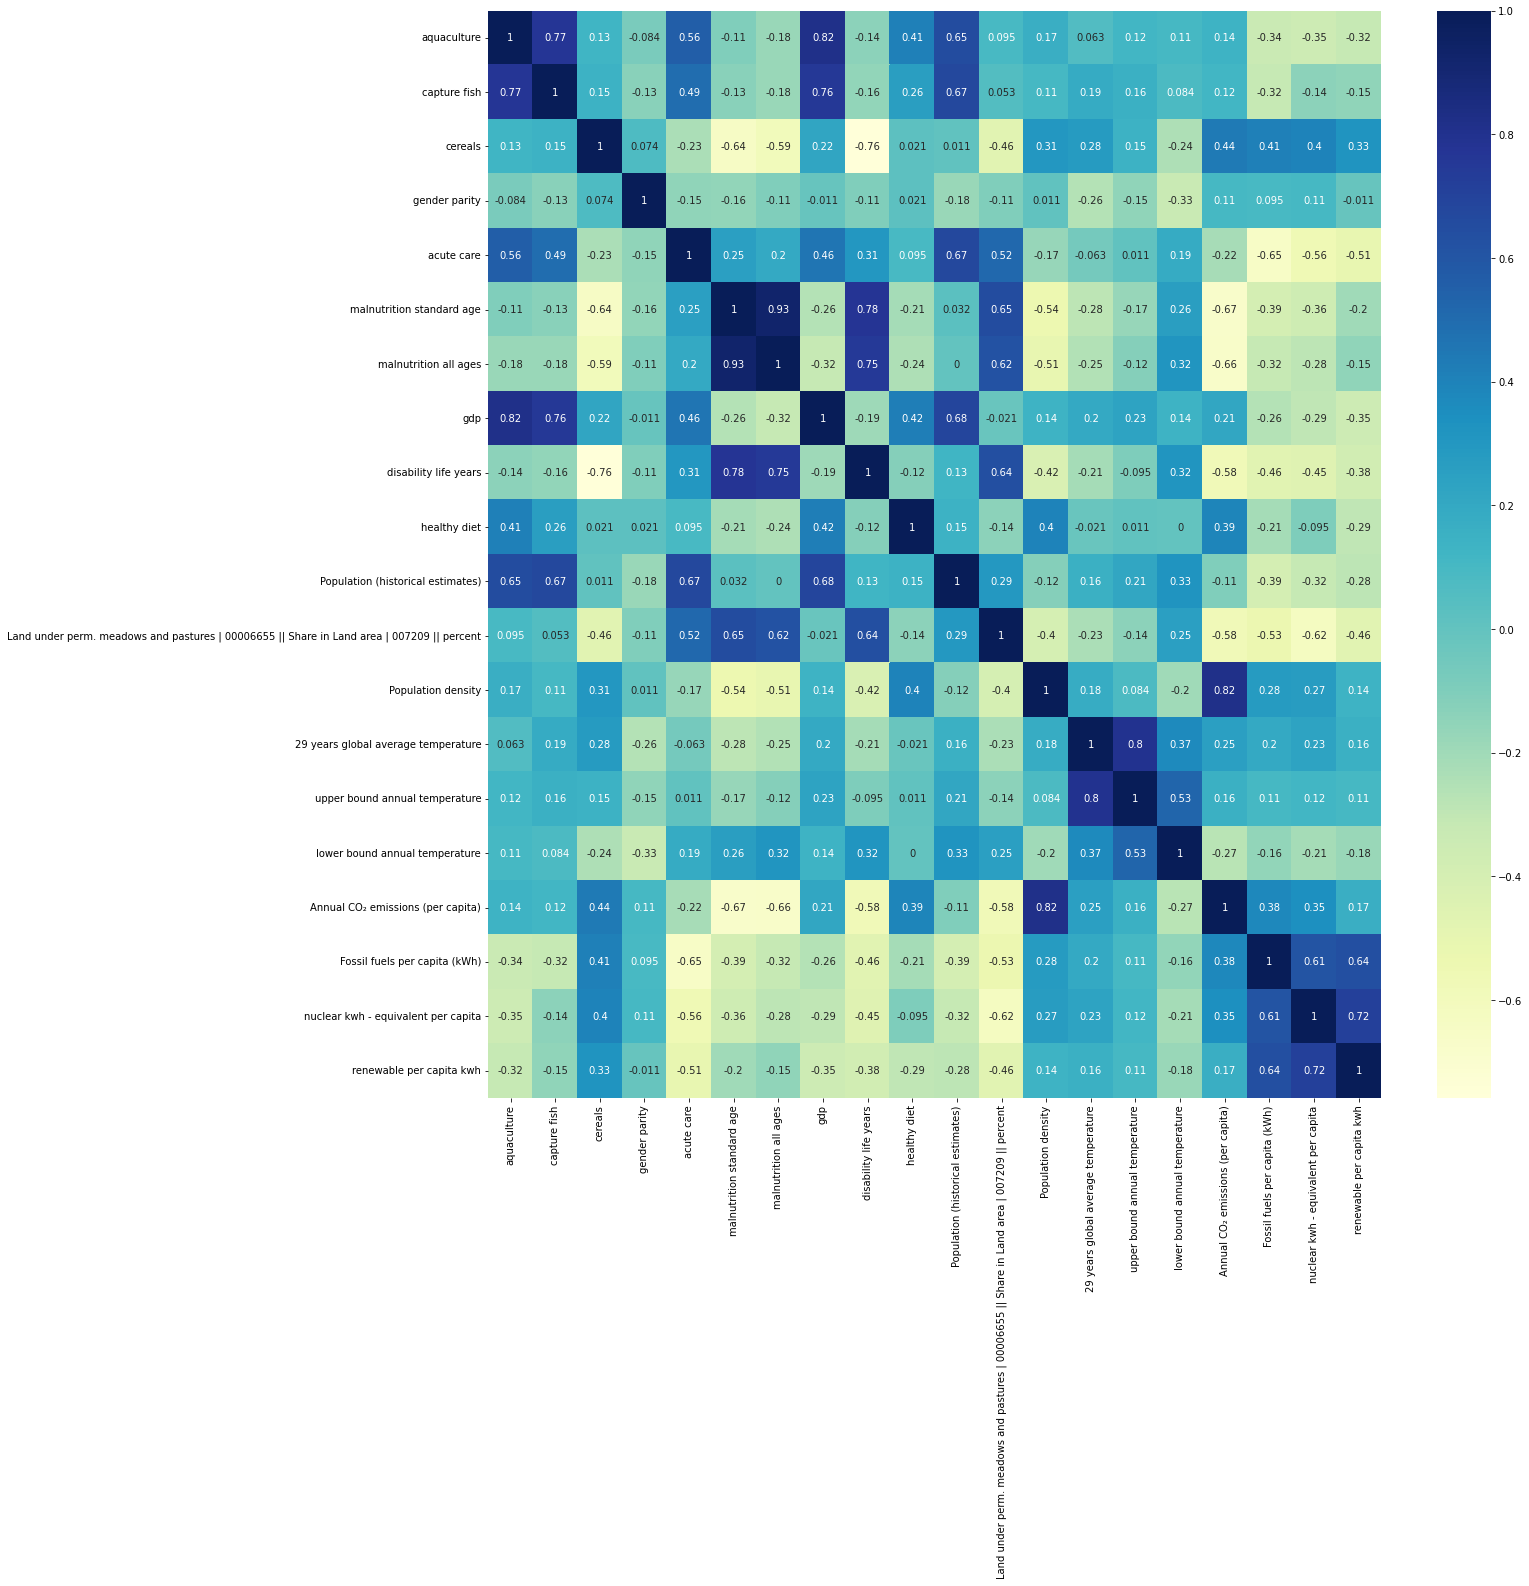

In [164]:
#Now what does this mean??
#The dark shades indicate a strong negative corelation
#The lighter shades indicate a strong positive corelation
#i.e if any variable is plotted against itself, it'll have a corelation of 1
rcParams['figure.figsize'] = 20, 20
sns.heatmap(df_kendall, 
           xticklabels=df_netto_info.columns.values, 
           yticklabels=df_netto_info.columns.values, 
           cmap="YlGnBu",
          annot=True)

Conclusion is, we have the Annual co2 emissions per capita has header because that is what we want to know. If you look for the highest predictor you will find out that with a plus 0.82 the winner is population density and the one who do the best actually is with a minus of -0.67 is malnutrition standard age.

In [165]:
#how to find correlation between different csv files
correlation = df_netto_info["acute care"].corr(df_netto_info['Annual CO₂ emissions (per capita)'])

correlation 

-0.13930468103858643

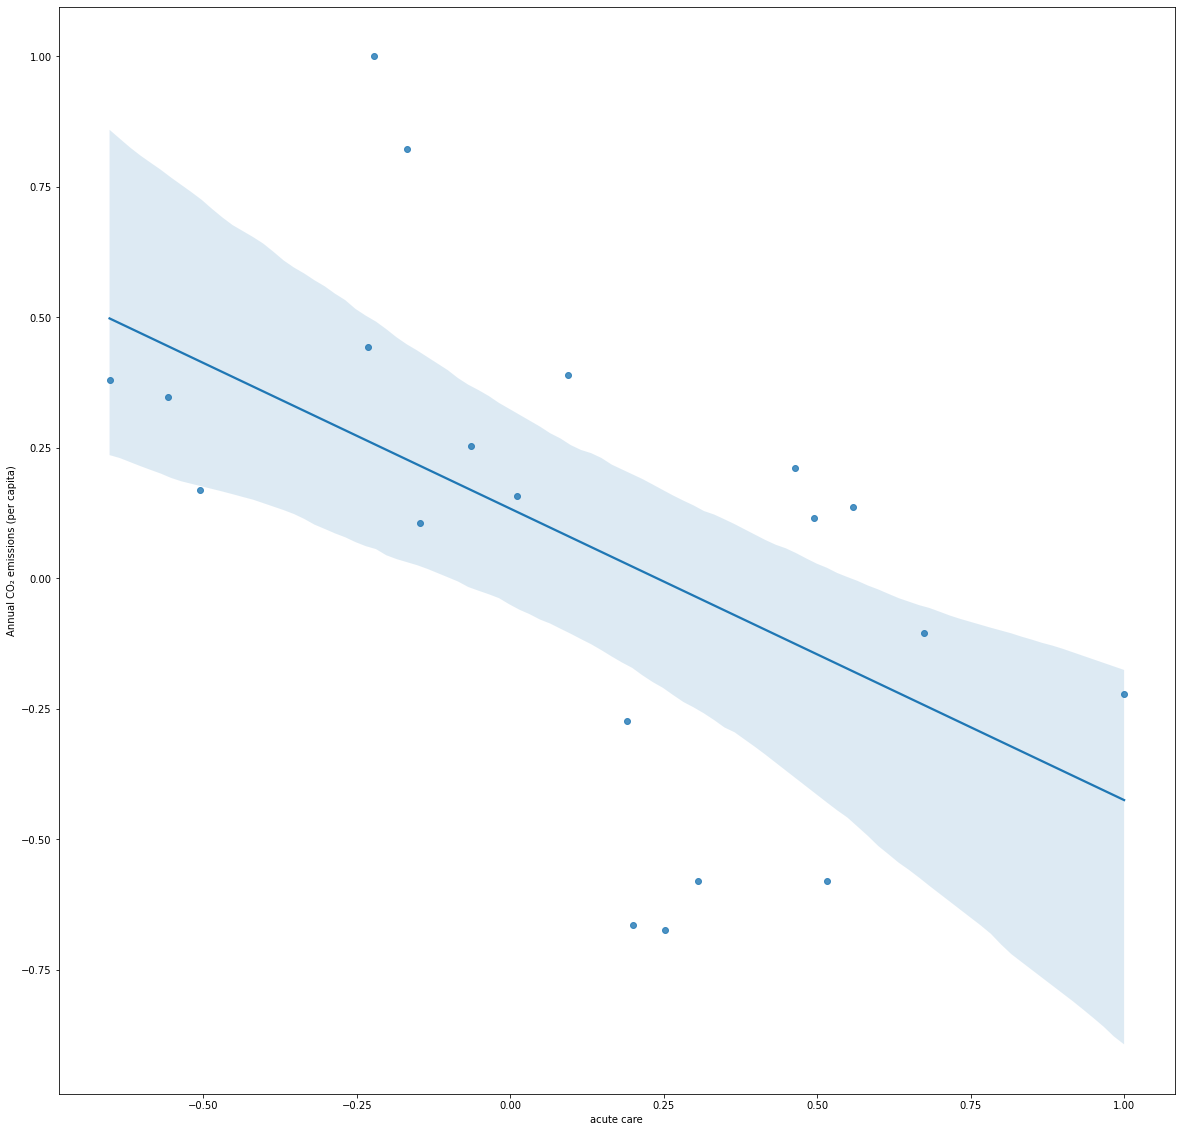

In [166]:
#down here i put some examples about how to compare correlation between different dataframes, but important is to use Annual CO2 emissions (per capita) to compare'
#because that is what we looking for
sns.regplot(x=df_kendall["acute care"], y=df_kendall["Annual CO₂ emissions (per capita)"])

plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

#conclusion is not eating the food, but food production creates the most co2 output, looking at the fishing industry but also our new way so called healthy food like vegetarian and vegan ('Healthy diet'),
#is a big polluter industry. So stay normal and eat normal food like omnivores because its the variously type of food relieves load correctly the co2 output globaly. See the public health industry it's very less
#carrying for the global co2 output('acute care' and 'disability life years'), also gdp is a bit determine in the output but it's less disturbing comparable then cereals output globally